# **Time Series Analysis**

Time series models are used to forecast future events based on previous events that have been observed at regular time intervals. It is nothing but a series of data points that are observed with respect to time, and is a class of model that captures a suite of different standard temporal structures in time series data. Two main goals of time series analysis are: 

- Identifying the nature of the phenomenon represented by the sequence of observations 
- Forecasting (predicting future values of the time series variable)

Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary through the use of mathematical transformations. A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. A given time series is thought to consist of four systematic components:

- Trend (describes the movement along the term)
- Seasonality (repeating short-term cycle in the series)
- Cyclic Variations (repeated but non-periodic fluctuations)
- Noise (random variation in the series)

Also, we have to choose between any of the two appraoches regarding our decision about trying to fit the model either on:

- All of provided data (statistical appraoch)
- Do the Train-Test split on the provided data (machine learning approach) 

For our analysis the second approach will be used. However, when doing Time-Test split for time series the process is a bit different. Rather than using a random sample as one may do when fitting a regression model, we have to split the data based on datetime.

### **Data Wrangling**

In [1]:
# Import libraries
import os, sys
import numpy as np
import scipy
import pandas as pd
import seaborn as sns
from math import sqrt
import datetime 
import sklearn
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import rmse
import statsmodels.api as sm
from prophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from neuralprophet import NeuralProphet, set_log_level
set_log_level("ERROR")
from prophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric
import pandas_profiling
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,10
import warnings
warnings.filterwarnings("ignore")

In [2]:
electric_load = pd.read_csv(r'C:\Users\hassa\OneDrive\Desktop\spiced_excercises\scikit-cilantro-student-code\week_12\data\LoadProfile_20IPs_2016.csv', delimiter = ';')

In [3]:
electric_load

,Timestamp,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20
0,01.01.2016 00:15:00,39,332.16,10.552,416.0,13.12,0.12,6.0,120,70,...,0.0,27.400,29.6,65.00,2462.4,6.200,0.96,25.8,11.46,220
1,01.01.2016 00:30:00,41,321.36,10.300,418.4,13.12,0.24,6.0,116,74,...,0.0,25.448,30.4,66.00,2462.4,6.200,0.90,34.2,11.32,224
2,01.01.2016 00:45:00,39,336.48,10.348,419.6,13.76,0.12,6.0,108,68,...,0.0,27.000,30.4,68.00,2459.2,5.876,0.90,38.4,11.62,226
3,01.01.2016 01:00:00,40,319.20,10.600,422.0,13.44,0.12,8.0,112,80,...,0.0,27.552,29.6,67.00,2451.2,6.200,1.02,19.8,9.40,220
4,01.01.2016 01:15:00,39,322.80,10.148,418.8,13.44,0.24,6.0,120,72,...,272.0,24.900,31.2,66.00,2436.8,6.200,0.90,16.8,10.58,224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35135,31.12.2016 23:00:00,38,353.04,6.252,285.2,12.80,0.36,6.0,132,88,...,304.8,24.600,79.2,50.68,2356.8,5.548,1.38,28.2,12.66,280
35136,31.12.2016 23:15:00,38,357.12,5.752,290.0,13.44,0.24,8.0,140,90,...,308.0,24.500,79.2,50.32,2366.4,6.200,1.02,33.6,13.08,288
35137,31.12.2016 23:30:00,38,360.48,6.400,289.6,12.48,0.36,8.0,140,92,...,306.4,24.752,80.0,46.08,2356.8,5.876,0.96,42.6,12.76,284
35138,31.12.2016 23:45:00,38,365.04,8.948,288.4,13.12,0.36,6.0,136,92,...,302.0,24.200,79.2,46.60,2356.8,6.200,1.02,45.6,12.58,288


In [4]:
# Extract column for time series analysis
df = electric_load[['Timestamp', 'C1']]

In [5]:
df.to_csv(r'C:\Users\hassa\OneDrive\Desktop\spiced_excercises\scikit-cilantro-student-code\week_12\data\df.csv', index=False)

In [6]:
df.shape

(35140, 2)

In [7]:
# convert Timestamp to index
df1 = pd.read_csv(r'C:\Users\hassa\OneDrive\Desktop\spiced_excercises\scikit-cilantro-student-code\week_12\data\df.csv', parse_dates=['Timestamp'], index_col='Timestamp')

In [8]:
df1

,C1
Timestamp,
2016-01-01 00:15:00,39
2016-01-01 00:30:00,41
2016-01-01 00:45:00,39
2016-01-01 01:00:00,40
2016-01-01 01:15:00,39
...,...
2016-12-31 23:00:00,38
2016-12-31 23:15:00,38
2016-12-31 23:30:00,38


In [9]:
# Change Timestamp format to %d.%m.%Y %H:%M:%S 
df1.index = pd.to_datetime(df1.index, format = '%d.%m.%y %H:%M:%S').strftime('%d.%m.%Y %H:%M:%S')

In [10]:
df1

,C1
Timestamp,
01.01.2016 00:15:00,39
01.01.2016 00:30:00,41
01.01.2016 00:45:00,39
01.01.2016 01:00:00,40
01.01.2016 01:15:00,39
...,...
31.12.2016 23:00:00,38
31.12.2016 23:15:00,38
31.12.2016 23:30:00,38


In [11]:
df1.to_csv(r'C:\Users\hassa\OneDrive\Desktop\spiced_excercises\scikit-cilantro-student-code\week_12\data\df1.csv', index=False)

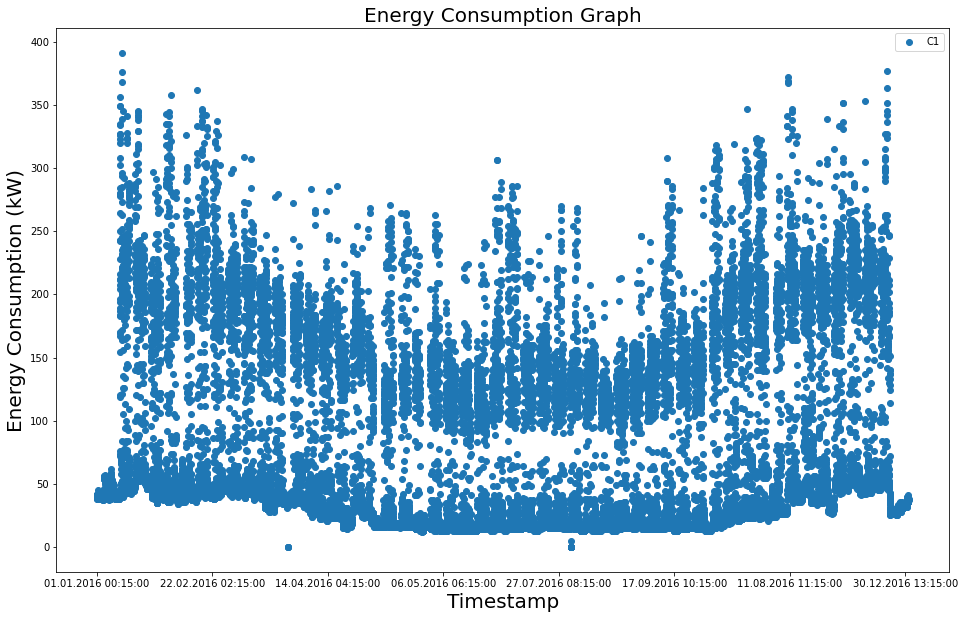

In [13]:
# Plot the shape of dataset 
df1.plot(style='o')
plt.xlabel("Timestamp", size=20)
plt.ylabel("Energy Consumption (kW)", size=20)
plt.title("Energy Consumption Graph", size=20)
plt.show()

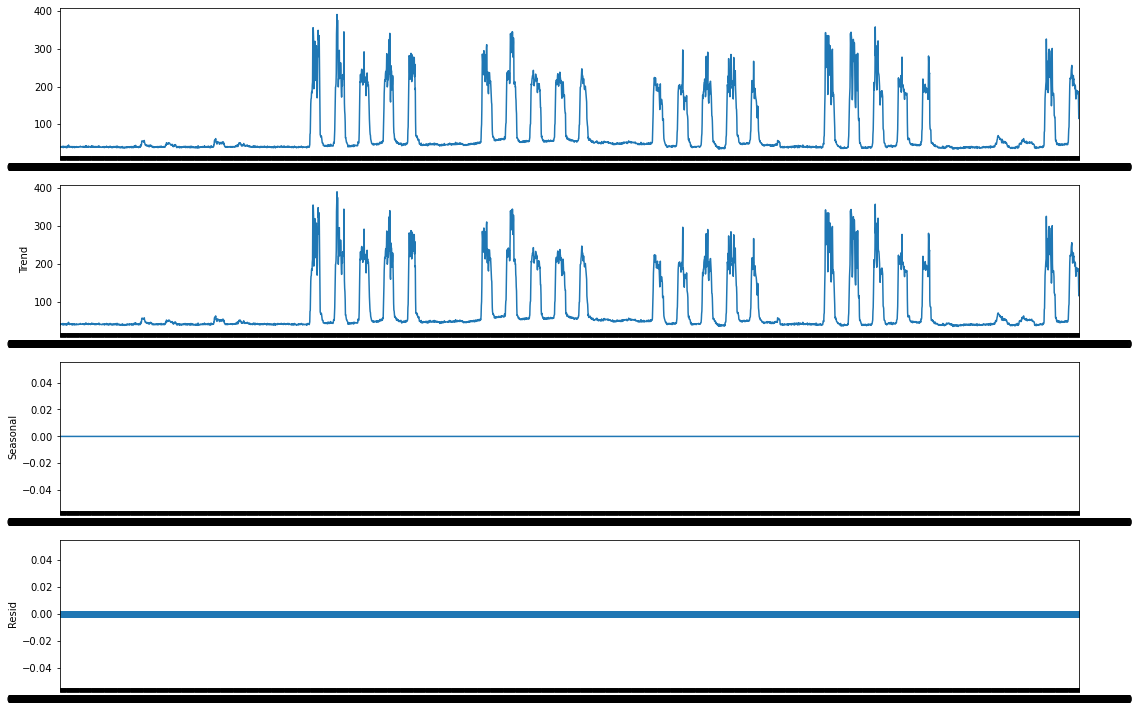

In [460]:
# Understand Dataset by Decomposing the Series
result = seasonal_decompose(df1[0:4000], model='additive', extrapolate_trend='freq', period=1)
result.plot()
plt.show()

### **Prophet Model**

Prophet is an open-source library developed by Facebook which aims to make time-series forecasting easier and more scalable. It is a type of generalized additive model (GAM), which uses a regression model with potentially non-linear smoothers. It is called additive because it adds multiple decomposed parts to explain some trends.  

y(t) = g(t)+s(t)+h(t)+e(t)

g(t) - Growth: Big trend, non-periodic changes

s(t) - Seasonality: Periodic changes (e.g. weekly, yearly, etc.) represented by Fourier Series

h(t) - Holiday effect: It represents irregular schedules

e(t) - Error: Any idiosyncratic changes not explained by the model

We create an instance of the Prophet class and then call its fit and predict methods. The input to Facebook Prophet is always a dataframe with two columns: ds and y. The ds (datestamp or timestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast. Our metric of interest will be RMSE. 

In [420]:
# Read the df.csv file
df2 = df.copy()
df2

,Timestamp,C1
0,01.01.2016 00:15:00,39
1,01.01.2016 00:30:00,41
2,01.01.2016 00:45:00,39
3,01.01.2016 01:00:00,40
4,01.01.2016 01:15:00,39
...,...,...
35135,31.12.2016 23:00:00,38
35136,31.12.2016 23:15:00,38
35137,31.12.2016 23:30:00,38
35138,31.12.2016 23:45:00,38


In [421]:
df2.columns = ['ds','y']

In [422]:
df2

,ds,y
0,01.01.2016 00:15:00,39
1,01.01.2016 00:30:00,41
2,01.01.2016 00:45:00,39
3,01.01.2016 01:00:00,40
4,01.01.2016 01:15:00,39
...,...,...
35135,31.12.2016 23:00:00,38
35136,31.12.2016 23:15:00,38
35137,31.12.2016 23:30:00,38
35138,31.12.2016 23:45:00,38


In [423]:
# split data 
train = df2[:-10000].copy()
test = df2[-10000:].copy()
print(f"Number of data points in train: {len(train)}")
print(f"Number of data points in test: {len(test)}")

Number of data points in train: 25140
Number of data points in test: 10000


In [424]:
train

,ds,y
0,01.01.2016 00:15:00,39
1,01.01.2016 00:30:00,41
2,01.01.2016 00:45:00,39
3,01.01.2016 01:00:00,40
4,01.01.2016 01:15:00,39
...,...,...
25135,18.09.2016 20:00:00,15
25136,18.09.2016 20:15:00,14
25137,18.09.2016 20:30:00,15
25138,18.09.2016 20:45:00,14


In [425]:
# Build Model, but use only train data, not test data for model fitting
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(train)

01:52:32 - cmdstanpy - INFO - Chain [1] start processing
01:52:36 - cmdstanpy - INFO - Chain [1] done processing


In [426]:
model.component_modes

{'additive': ['weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [427]:
# Create future dates of 365 days
future = model.make_future_dataframe(periods=365, freq='D')

In [428]:
# start of the future df is same as the train data, end of the future df is train+365 periods
future

,ds
0,2016-01-01 00:15:00
1,2016-01-01 00:30:00
2,2016-01-01 00:45:00
3,2016-01-01 01:00:00
4,2016-01-01 01:15:00
...,...
25500,2017-12-05 23:45:00
25501,2017-12-06 23:45:00
25502,2017-12-07 23:45:00
25503,2017-12-08 23:45:00


In [429]:
# predict the future
forecast = model.predict(future)

In [430]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
25500,2017-12-05 23:45:00,146.429778,-59.297783,302.626745,-22.475889,323.994425,-28.279431,-28.279431,-28.279431,-35.585688,-35.585688,-35.585688,7.306258,7.306258,7.306258,0.0,0.0,0.0,118.150348
25501,2017-12-06 23:45:00,146.633975,-44.630808,320.860716,-22.865157,324.850386,-17.557984,-17.557984,-17.557984,-35.585688,-35.585688,-35.585688,18.027705,18.027705,18.027705,0.0,0.0,0.0,129.075991
25502,2017-12-07 23:45:00,146.838171,-64.008187,301.444554,-23.237977,325.706348,-31.661323,-31.661323,-31.661323,-35.585688,-35.585688,-35.585688,3.924365,3.924365,3.924365,0.0,0.0,0.0,115.176848
25503,2017-12-08 23:45:00,147.042368,-86.418828,280.827305,-23.532323,326.966180,-47.806756,-47.806756,-47.806756,-35.585688,-35.585688,-35.585688,-12.221068,-12.221068,-12.221068,0.0,0.0,0.0,99.235611
25504,2017-12-09 23:45:00,147.246564,-96.581720,272.526492,-24.095949,328.208473,-62.213489,-62.213489,-62.213489,-35.585688,-35.585688,-35.585688,-26.627800,-26.627800,-26.627800,0.0,0.0,0.0,85.033075


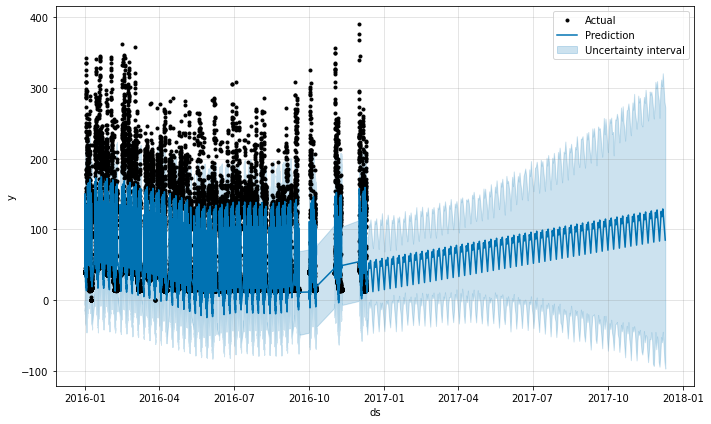

In [431]:
# plot the prediction
model.plot(forecast);
plt.legend(['Actual', 'Prediction', 'Uncertainty interval'])
plt.show()

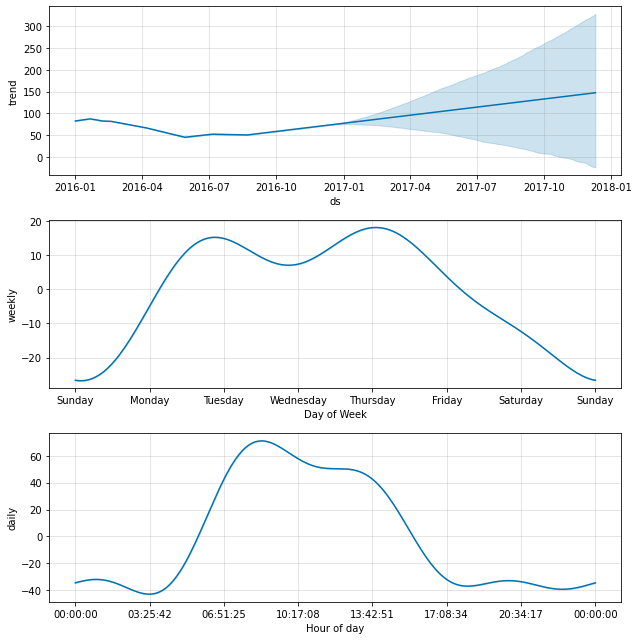

In [432]:
# Visualize Each Components 
model.plot_components(forecast);

Model Diagnostics

In [433]:
# test period
horizon = '300 days'

# itraining period (optional. default is 3x of horizon)
initial = str(365 * 5) 

# spacing between cutoff dates (optional. default is 0.5x of horizon)
period = '300 days' 

df_cv = cross_validation(model, initial=initial, period=period, horizon=horizon, parallel='processes')

Seasonality has period of 7 days which is larger than initial window. Consider increasing initial.


In [434]:
df_cv 

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-02-14 00:00:00,-18.449013,-79.351061,41.967345,38,2016-02-13 23:45:00
1,2016-02-14 00:15:00,-17.680470,-80.311022,44.049930,38,2016-02-13 23:45:00
2,2016-02-14 00:30:00,-17.157500,-76.779119,44.308652,41,2016-02-13 23:45:00
3,2016-02-14 00:45:00,-16.975670,-78.730740,48.057783,40,2016-02-13 23:45:00
4,2016-02-14 01:00:00,-17.205027,-76.435260,44.795695,41,2016-02-13 23:45:00
...,...,...,...,...,...,...
21488,2016-12-09 22:45:00,-595.302395,-3616.826188,2217.827761,20,2016-02-13 23:45:00
21489,2016-12-09 23:00:00,-594.901669,-3612.008549,2210.962066,19,2016-02-13 23:45:00
21490,2016-12-09 23:15:00,-594.242610,-3620.621577,2241.524511,19,2016-02-13 23:45:00
21491,2016-12-09 23:30:00,-593.400374,-3627.940953,2228.536024,22,2016-02-13 23:45:00


In [435]:
# performance metrics  
df_metrics = performance_metrics(df_cv)  
df_metrics

,horizon,mse,rmse,mae,mdape,smape,coverage
0,22 days 09:15:00,6038.549778,77.708106,66.765894,0.872506,1.302175,0.61517
1,22 days 09:30:00,6039.803369,77.716172,66.775310,0.872506,1.301939,0.61517
2,22 days 09:45:00,6040.822645,77.722729,66.783247,0.872506,1.301667,0.61517
3,22 days 10:00:00,6041.620020,77.727859,66.789402,0.872506,1.301405,0.61517
4,22 days 10:15:00,6042.315133,77.732330,66.794927,0.872506,1.301136,0.61517
...,...,...,...,...,...,...,...
19340,299 days 23:00:00,308126.569324,555.091496,550.452206,18.108373,2.000000,1.00000
19341,299 days 23:15:00,308154.649978,555.116789,550.476073,18.205808,2.000000,1.00000
19342,299 days 23:30:00,308219.173603,555.174904,550.534705,18.231773,2.000000,1.00000
19343,299 days 23:45:00,308297.927637,555.245826,550.608096,18.325922,2.000000,1.00000


In [436]:
# Evaluate the Prophet model on test set
prediction = forecast.iloc[-len(test):]['yhat']
actuals = test['y']
print(f"RMSE: {round(rmse(prediction, actuals))}")

RMSE: 98


Text(0.5, 1.0, 'Model Loss (MAE)')

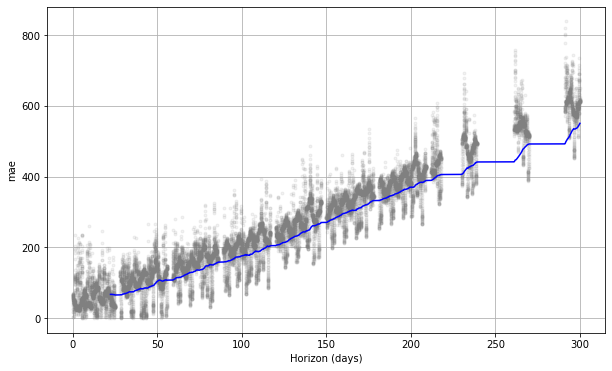

In [455]:
# Prophet Model Loss (MAE)
fig = plot_cross_validation_metric(df_cv, metric='mae')

### **NeuralProphet Model**

Prophet (2017) is the predecessor to NeuralProphet (2020) — the latter incorporates some autoregressive deep learning. It is the second iteration of Prophet and incorporates deep learning terms to our equation which are fit on autoregressed (lagged) data. Theoretically and empirically, NeuralProphet is supposed to be a superior model. 

In [375]:
df3 = train.copy()

In [376]:
df3

,ds,y
0,01.01.2016 00:15:00,39
1,01.01.2016 00:30:00,41
2,01.01.2016 00:45:00,39
3,01.01.2016 01:00:00,40
4,01.01.2016 01:15:00,39
...,...,...
25135,18.09.2016 20:00:00,15
25136,18.09.2016 20:15:00,14
25137,18.09.2016 20:30:00,15
25138,18.09.2016 20:45:00,14


In [337]:
m = NeuralProphet()
model = m.fit(train, freq='D')

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

In [339]:
# create forecast for year 2017
future = m.make_future_dataframe(train, periods=365)
forecast = m.predict(future)
forecast.head()

,ds,y,yhat1,residual1,trend,season_weekly,season_daily
0,2016-12-10 23:45:00,None,9.097942,NaN,71.279770,-25.976240,-36.205589
1,2016-12-11 23:45:00,None,30.733719,NaN,71.409538,-4.470229,-36.205589
2,2016-12-12 23:45:00,None,49.906738,NaN,71.539322,14.573008,-36.205589
3,2016-12-13 23:45:00,None,41.572277,NaN,71.669090,6.108777,-36.205589
4,2016-12-14 23:45:00,None,52.693039,NaN,71.798866,17.099760,-36.205589


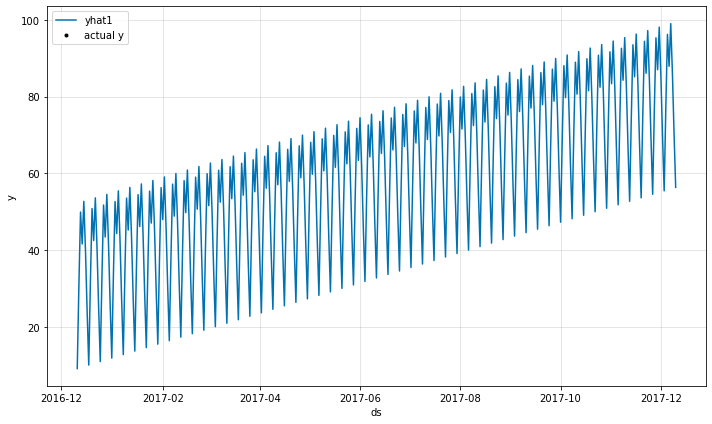

In [340]:
# create plots
fig_forecast = m.plot(forecast)

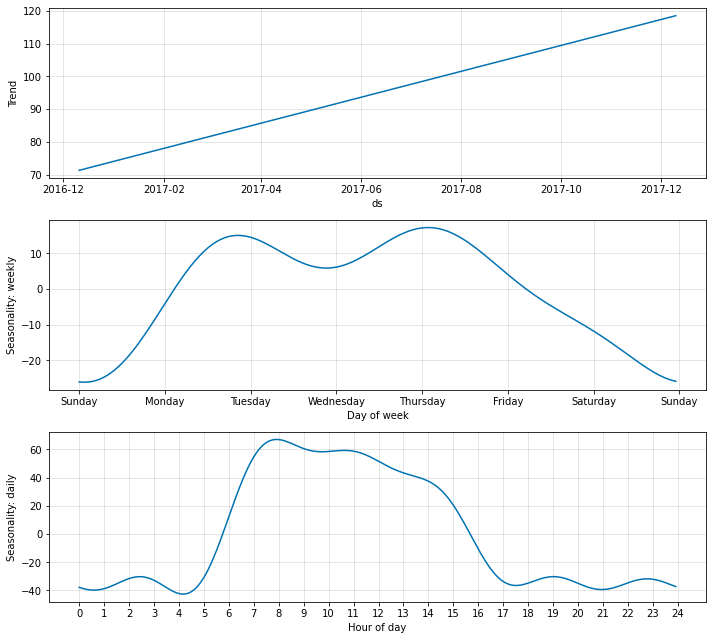

In [341]:
fig_components = m.plot_components(forecast)

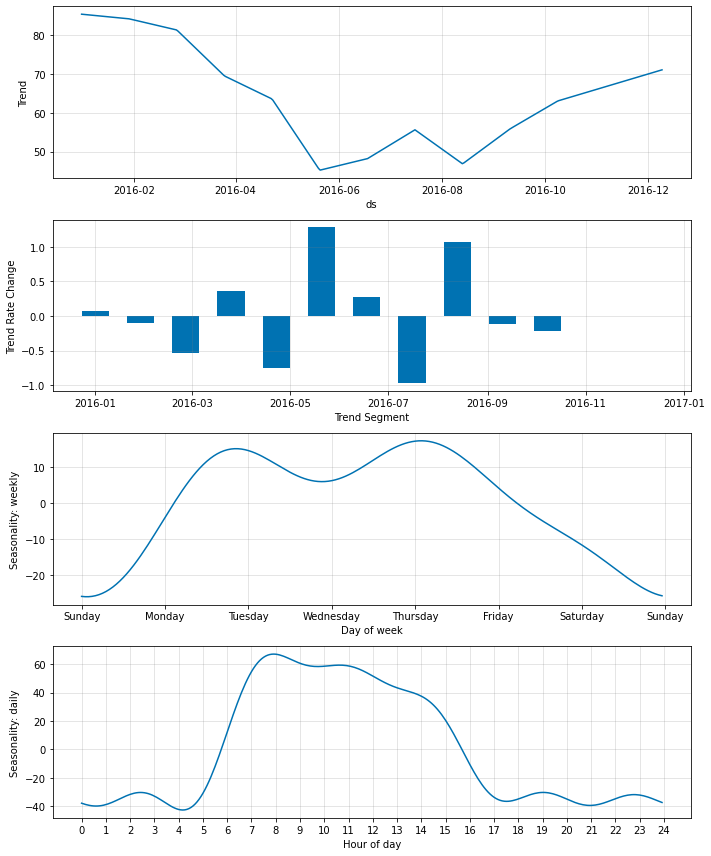

In [342]:
fig_model = m.plot_parameters()

Model Diagnostics

In [417]:
m1 = NeuralProphet(seasonality_mode= "multiplicative", learning_rate = 0.1)
df_train, df_test = m1.split_df(train, freq="D", valid_p=0.2)

In [418]:
metrics_train = m1.fit(df=df_train, freq="D")

In [437]:
# Evaluate the NeuralProphet model on test set
metrics_test = m1.test(df_test)
metrics_test

,SmoothL1Loss,MAE,RMSE
0,0.048371,39.929812,60.659102


Text(0.5, 1.0, 'Model Loss (MAE)')

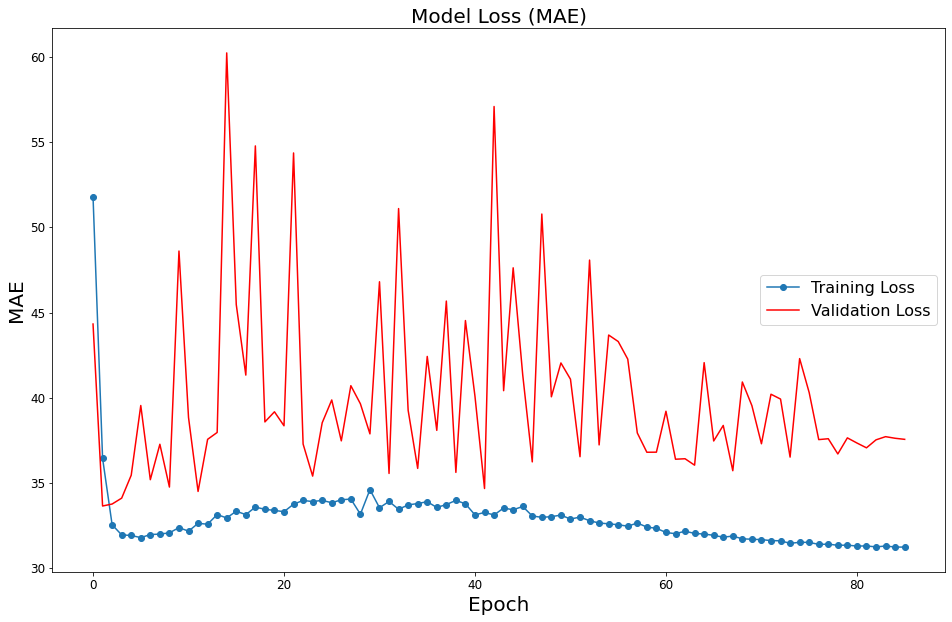

In [458]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(metrics["MAE"], '-o', label="Training Loss")  
ax.plot(metrics["MAE_val"], '-r', label="Validation Loss")
ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Epoch", fontsize=20)
ax.set_ylabel("MAE", fontsize=20)
ax.set_title("Model Loss (MAE)", fontsize=20)